In [1]:

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import re

def vector_dist(v1, v2): # euclidean distance between 2 points
    return math.sqrt(np.sum([(v1[i] - v2[i])**2 for i in range(len(v1))]))

true_diag = [20, 59]
true_antidiag = [36, 35]
mlen = 3 # number states


In [2]:
def parser_arr(filename):
    # returns array of all traansitions and list of all class and transition thresholds
    transitions = []
    thresholds = []
    vidarrs = []
    with open(filename) as textfile:
        line = textfile.readline()
        #print('opened', line)
        while line:
            if 'Processing' in line:
                vidnum = line.split('pp_')[-1]
                vidnum = vidnum.split('.avi')[0]
                vidnum = vidnum.split('_')[0]
                vidnum = int(vidnum)
                #print(vidnum)
                line = textfile.readline()
            if 'T threshold'in line:
                thresh_set = []
                for word in line.split():
                    try:
                        thresh_set.append(float(word))
                    except ValueError:
                        pass
                    
                line = textfile.readline()
                #print('after t', line)
                if 'C threshold' in line:
                    for word in line.split():
                        try:
                            thresh_set.append(float(word))
                        except ValueError:
                            pass
                        
                
                    if len(thresholds) ==0 or thresholds[-1] != thresh_set:
                        #print(thresh_set)
                        thresholds.append(thresh_set)
                        vidnums=[]
                        vidarrs.append([[], vidnums])
                        vidsarr = np.zeros((mlen,mlen))
                        transitions.append(vidsarr)
                    else:
                        pass    
                    
                    line = textfile.readline()
                    #print('array lives here', line)
                    if '[[' in line:
                        arr = np.zeros((mlen,mlen))
                        #print(arr)
                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[0,:] = linenums

                        line = textfile.readline()
                        #print('array lives here', line)   

                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[1,:] = linenums

                        line = textfile.readline()
                        #print('array lives here', line)   

                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[2,:] = linenums

                        transitions[-1] += arr
                        vidarrs[-1][0].append(arr)
                        vidarrs[-1][1].append(vidnum)
                        #print(arr,'\n', transitions[-1])
                    else:
                        print("missing array")
                    #print(thresholds[-1])
                else:
                    print("missing C thresh")
                
                
                    
            line = textfile.readline()
            #print(line, 'moved on')
                    
                
            
    textfile.close()
    #print(transitions, thresholds)
    return([transitions, np.array(thresholds), vidarrs]) 


In [3]:
cols = [ 'mediumslateblue','fuchsia','darkviolet' ]
print(parser_arr(glob('./output 052*.txt')[0]))

[[array([[100.,   1.,  51.],
       [  2.,   1.,   0.],
       [ 59.,   0., 137.]]), array([[ 92.,   1.,  29.],
       [  2.,   1.,   0.],
       [ 37.,   0., 151.]]), array([[13.,  1., 46.],
       [ 2.,  0.,  0.],
       [50.,  0., 26.]])], array([[30.        , 22.        ],
       [30.        , 35.        ],
       [34.57142857, 22.        ]]), [[[array([[ 8.,  1., 38.],
       [ 2.,  1.,  0.],
       [38.,  0.,  0.]]), array([[3., 0., 1.],
       [0., 0., 0.],
       [2., 0., 4.]]), array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  0., 12.]]), array([[ 0.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 2.,  0., 12.]]), array([[4., 0., 6.],
       [0., 0., 0.],
       [7., 0., 2.]]), array([[1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 3.]]), array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 7.]]), array([[56.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  6.]]), array([[ 1.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0., 26.]]), array([[25.,  0.,

[1, 10, 11, 12, 13, 14, 15, 2, 3, 4, 6, 7, 8, 9]
[ 0  7  8  9 10 11 12 13  1  2  3  4  5  6]
[[[ 8.  1. 38.]
  [ 2.  1.  0.]
  [38.  0.  0.]]

 [[56.  0.  1.]
  [ 0.  0.  0.]
  [ 2.  0.  6.]]

 [[ 1.  0.  1.]
  [ 0.  0.  0.]
  [ 0.  0. 26.]]

 [[25.  0.  1.]
  [ 0.  0.  0.]
  [ 1.  0. 59.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 1.  0.  1.]
  [ 0.  0.  0.]
  [ 1.  0.  2.]]

 [[ 1.  0.  0.]
  [ 0.  0.  0.]
  [ 1.  0.  3.]]

 [[ 0.  0.  1.]
  [ 0.  0.  0.]
  [ 2.  0.  1.]]

 [[ 3.  0.  1.]
  [ 0.  0.  0.]
  [ 2.  0.  4.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 1.  0. 12.]]

 [[ 0.  0.  1.]
  [ 0.  0.  0.]
  [ 2.  0. 12.]]

 [[ 4.  0.  6.]
  [ 0.  0.  0.]
  [ 7.  0.  2.]]

 [[ 1.  0.  0.]
  [ 0.  0.  0.]
  [ 1.  0.  3.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 1.  0.  7.]]]
[54.33526012  1.73410405 43.93063584] [61.22931442 11.82033097 26.95035461]
[93.44262295  0.          6.55737705] [61.62280702  0.         38.37719298]
[  0.   0. 100.] [25.  0. 75.]
[30.23255814 -0.        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


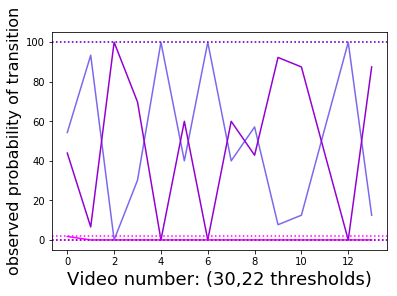

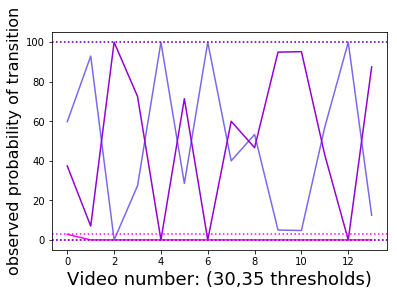

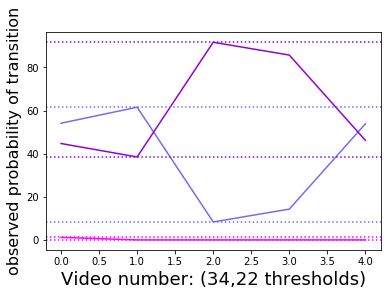

In [4]:
#broad observations array
trans_runs= parser_arr(glob('./output 052*.txt')[0])
def ratio(row):
    sums = np.sum(row)
    if sums > 0:
        return row/sums
    else:
        return row
index = list(range(len(trans_runs[0])))

criteria = []

for i in index:
    x1 = []
    x2 = []
    x3 = []
    c_threshes = []
    t_threshes = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = np.array(trans_runs[2][i][0])
    vidnums = trans_runs[2][i][1]
    print(vidnums)
    inds=np.argsort(vidnums)
    print(inds)
    vidarrs = vidarrs[inds]
    print(vidarrs)
    #vidarrs = np.cumsum(vidarrs, axis=0)
    t_threshes.append(trans_threshes[0])
    c_threshes.append(trans_threshes[1])
    criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
    vidnums = list(range(len(vidarrs)))
    for vidnum in vidnums: 
        T_obb = vidarrs[vidnum]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        print(evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm))
        x1.append(evec_one[0])
        x2.append(evec_one[1])
        x3.append(evec_one[2])
    fig,ax = plt.subplots()
    print(len(t_threshes), len(x1))        
    plt.plot(vidnums, x1,c = cols[0], ls = '-')
    plt.plot(vidnums,x2, c = cols[1], ls = '-')
    plt.plot(vidnums,x3, c = cols[2], ls = '-')

    plt.axhline(y=min(x1), c = cols[0], ls = ':')
    plt.axhline(y=min(x2), c = cols[1], ls = ':')
    plt.axhline(y=min(x3), c = cols[2], ls = ':')
    plt.axhline(y=max(x1), c = cols[0], ls = ':')
    plt.axhline(y=max(x2), c = cols[1], ls = ':')
    plt.axhline(y=max(x3), c = cols[2], ls = ':')
    plt.xlabel('Video number: ('+criteria[i]+' thresholds)', fontsize=18)
    plt.ylabel('observed probability of transition', fontsize=16)

In [5]:
# window sum - outputs cumulative sum for n windows ahead, unil th elen-n item
def windowsum(array, winlen):
    outlen = len(array) - winlen
    out = np.copy(array[0]) * outlen
    for i in range(outlen):
        out[i] = np.sum(array[0:i+1], axis=0)
    return out
    

[1, 10, 11, 12, 13, 14, 15, 2, 3, 4, 6, 7, 8, 9]
[ 0  7  8  9 10 11 12 13  1  2  3  4  5  6]
[54.33526012  1.73410405 43.93063584] [61.22931442 11.82033097 26.95035461]
[69.17193216  0.9976721  29.83039574] [71.72054998 11.43162393 16.84782609]
[59.05292479  0.8356546  40.11142061] [61.18099231 11.42557652 27.39343117]
[49.71751412  0.56497175 49.71751412] [55.3030303  11.36363636 33.33333333]
[49.71751412  0.56497175 49.71751412] [55.3030303  11.36363636 33.33333333]
[49.53789279  0.55452865 49.90757856] [55.22940851 11.35986733 33.41072416]
[49.58360026  0.55092889 49.86547085] [55.2500222  11.35802469 33.3919531 ]
[49.78240534  0.54907065 49.66852402] [55.33462211 11.35620915 33.30916874]
[49.99050332  0.53561254 49.47388414] [55.42685543 11.34920635 33.22393822]
[48.42894206  0.51888152 51.05217642] [54.77915804 11.34920635 33.87163561]
[47.   0.5 52.5] [54.20466059 11.34751773 34.44782168]
[47.61430587  0.47298979 51.91270434] [54.40261381 11.33186166 34.26552452]
[47.67724839  0.

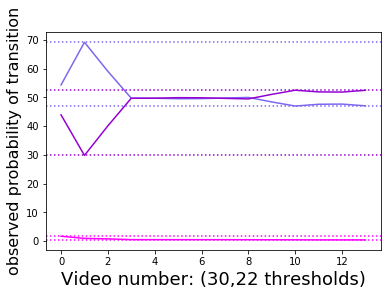

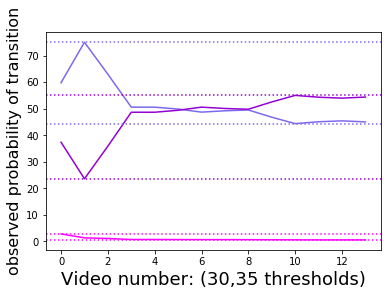

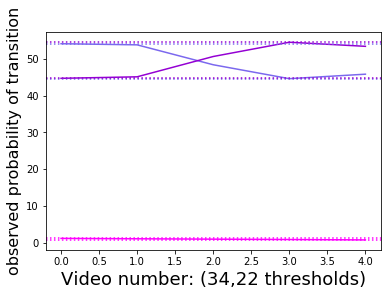

In [6]:
#broad observations array
trans_runs= parser_arr(glob('./output 052*.txt')[0])
def ratio(row):
    sums = np.sum(row)
    if sums > 0:
        return row/sums
    else:
        return row
index = list(range(len(trans_runs[0])))

criteria = []

for i in index:
    x1 = []
    x2 = []
    x3 = []
    c_threshes = []
    t_threshes = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = np.array(trans_runs[2][i][0])
    vidnums = trans_runs[2][i][1]
    print(vidnums)
    inds=np.argsort(vidnums)
    print(inds)
    vidarrs = vidarrs[inds]
    #print(vidarrs)
    vidarrs = np.cumsum(vidarrs, axis=0)
    t_threshes.append(trans_threshes[0])
    c_threshes.append(trans_threshes[1])
    criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
    vidnums = list(range(len(vidarrs)))
    for vidnum in vidnums: 
        T_obb = vidarrs[vidnum]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        print(evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm))
        x1.append(evec_one[0])
        x2.append(evec_one[1])
        x3.append(evec_one[2])
    fig,ax = plt.subplots()
    print(len(t_threshes), len(x1))        
    plt.plot(vidnums, x1,c = cols[0], ls = '-')
    plt.plot(vidnums,x2, c = cols[1], ls = '-')
    plt.plot(vidnums,x3, c = cols[2], ls = '-')

    plt.axhline(y=min(x1), c = cols[0], ls = ':')
    plt.axhline(y=min(x2), c = cols[1], ls = ':')
    plt.axhline(y=min(x3), c = cols[2], ls = ':')
    plt.axhline(y=max(x1), c = cols[0], ls = ':')
    plt.axhline(y=max(x2), c = cols[1], ls = ':')
    plt.axhline(y=max(x3), c = cols[2], ls = ':')
    plt.xlabel('Video number: ('+criteria[i]+' thresholds)', fontsize=18)
    plt.ylabel('observed probability of transition', fontsize=16)

In [8]:
for vid in vidlist
props = propa [all lsit befor evid], propb [all list before vid], propc [all list before vid]

SyntaxError: invalid syntax (<ipython-input-8-23eb30c4abb5>, line 1)